# Analyzing Text About Data Science

## Goal

> Finding concepts relevant to the field of data science by doing some text mining.

> From an article about data science on wikipedia, I will extract keywords from it and then visualize the results 

### Link to the article

In [1]:
url = 'https://en.wikipedia.org/wiki/Data_science'

### Getting the data

I will be using the request library for this and printing out the first 1000 words found in this article

In [3]:
import requests

text = requests.get(url).content.decode('utf-8')

print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"a44e4ab7-86f9-4dfe-b3d8-5e17443f16c6","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1083880658,"wgRevisionId":1083880658,"wgArticleId":35458904,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description matches Wikidata","Use dmy dates from August 2021","Information science","Computer occupations","Comput

### Transforming the data

Since the format of the text downloaded above is html

I need to change it to text which is suitable for processing by using the HTMLparser object from python

Next i have to define the text that will be collected inside the HTML tags

In [5]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""

    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script", "style"]:
            self.script = True

    def handle_endtag(self, tag):
        if tag.lower() in ["script", "style"]:
            self.script = False

    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance v

### Getting insights

I will uncover the insights from the processed data by extracting keywords from the text and see which of them are more meaningful

The python library "Rake can help in doing this

I will set the minimum length of a word to 5 characters, minimum frequency of a keyword in my data to 3 and maximum number of words in a keyword to 2

In [6]:
import nlp_rake

extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)

res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.912280701754386),
 ('computer science', 3.912280701754386),
 ('information science', 3.8011695906432745),
 ('data analysis', 3.7142857142857144),
 ('application domains', 3.6),
 ('science', 1.912280701754386),
 ('field', 1.25),
 ('classification', 1.25),
 ('statistics', 1.2272727272727273),
 ('techniques', 1.2),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

### Visualizing The Result

I will use the matplotlib library to plot a simple distribution of the keywords with their relevance

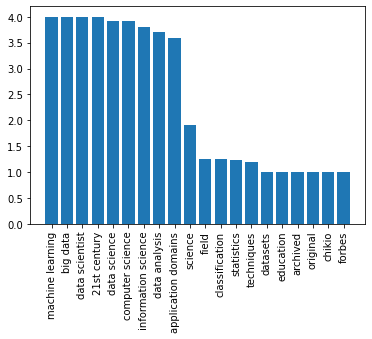

In [8]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k, v = zip(*pair_list)
    plt.bar(range(len(k)), v)
    plt.xticks(range(len(k)), k, rotation='vertical')
    plt.show()

plot(res)

There is much more better way to visualize this result and that is by using a word cloud

### Word cloud 

A word cloud object basically takes in text or pre computed list of words with their frequencies and returns an image which can be displayed using matplotlib